In [1]:
# -*- coding: utf-8 -*-
"""
Created on 

@author: 
"""
import numpy as np
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Obtiene el modelo salvado en previamente
model_and_features = joblib.load("diabetes_random_forest_model.joblib")

# Recupera el índice con los nombres de las características seleccionadas

list_features = list(model_and_features['feature_names'])

c:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\angel\anaconda3\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
# Muestra los nombres de las características
print('\n Las características elegidas son:')
print(list_features)

# Recupera los datos del dataset
dataframe = pd.read_csv("diabetes.csv")

# Obtiene las variables predictoras y objetivo
X = dataframe[list_features]
y = dataframe['Outcome']

# Normalizar los valores
escaler = StandardScaler()
X = escaler.fit_transform(X)

# Divide el conjunto de datos en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Calcular k
k = int(np.sqrt( X.shape[0]));

if k%2==0: #Hacer que K sea impar 
   k=k+1


 Las características elegidas son:
['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [3]:
# Crea un modelo de machine learning k-NN 
k_nn_model = KNeighborsClassifier(n_neighbors=k)

# Entranamiento
k_nn_model.fit(X_train, y_train)

#Prueba el modelo 
y_pred = k_nn_model.predict(X_test)

# Calcular las métricas ('y' reales vs 'y' predichas)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


Metricas de rendimiento:

Exactitud (Accuracy): 0.7467532467532467
Precisión (Precision): 0.6538461538461539
Sensibilidad (Recall): 0.6181818181818182
Puntuación F1 (F1 Score): 0.6355140186915889
ROC AUC:  0.7181818181818181
Matriz de confusión


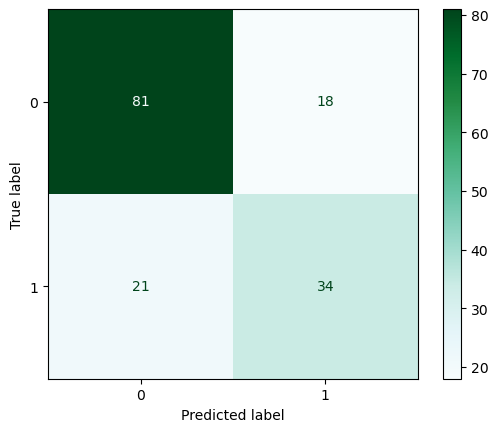

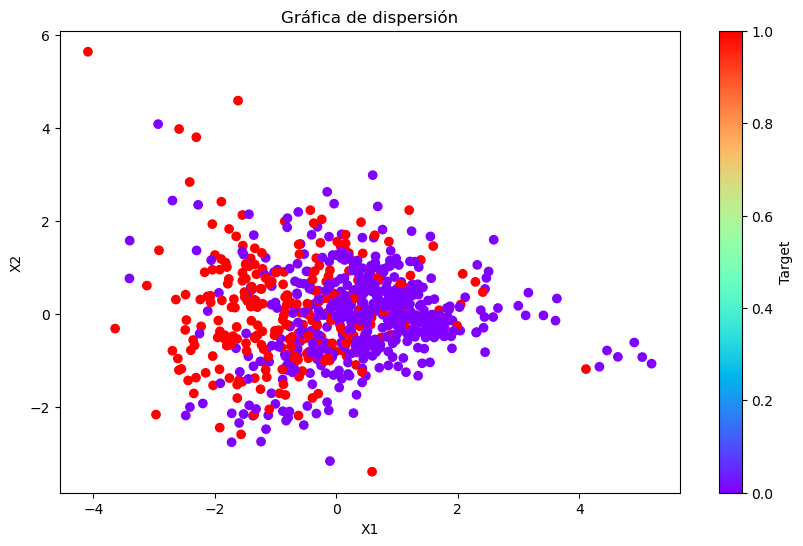

In [4]:

# Imprimir las métricas
print("\nMetricas de rendimiento:\n")
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("Puntuación F1 (F1 Score):", f1)
print("ROC AUC: ",roc_auc )

# Despliega la matriz de confusión
print("Matriz de confusión")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap="BuGn")

# Aplica análisis de componentes principales
# para reducir las dimensiones y poder graficar en 2D

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(data=X_pca, columns=['X_1', 'X_2'])
df_pca['objetivo'] = y

# Gráfica de dispersión (Componentes principales)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['X_1'], df_pca['X_2'], c=df_pca['objetivo'], cmap='rainbow')
plt.colorbar(scatter, label='Target')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Gráfica de dispersión')
plt.show()

In [8]:

resp = input('Desea probar el modelo con sus datos? (SI/NO): ')

if resp.upper()=='SI':

    # Pone el modelo en "producción"
    # Adquirir los datos del usuario
    # Ejemplo: 149,70,33,.62,55 (Diabetes)
    
    print ('\nIndique los datos que se le soliciten')
    prod_features = []

    for feat in list_features:
        value = float(input(feat+': '))
        prod_features.append(value)

    # Crear un dataframe con los datos capturados   

    df_prod = pd.DataFrame([prod_features], columns=list_features)

    # Normalizar los datos capturados
    df_prod = escaler.transform(df_prod)
    
    prediccion = k_nn_model.predict(df_prod)

    print('\nCon los datos')
    print('Datos originales',prod_features)
    print('Datos normalizados',df_prod)

    # Muestra diagnóstico
    if prediccion[0]==1:
        print('\nEl modelo predice que SI padece la enfermedad :( \n')
    else:
        print('\nEl modelo predice que NO padece la enfermedad :) \n')
        
# eFin


Indique los datos que se le soliciten

Con los datos
Datos originales [130.0, 60.0, 30.0, 40.0, 25.0]
Datos normalizados [[  0.28497518  -0.47073225  -0.25289651 119.37962466  -0.70119842]]

El modelo predice que SI padece la enfermedad :( 

